## Problem 1

In [1]:
## Importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import os

In [2]:
## Checking the current working directory
os.getcwd()

'C:\\Users\\l\\Downloads'

In [3]:
## Changing the working directory
os.chdir('C:\\Users\\l\\Downloads')

In [4]:
# Read the data as a data frame
df = pd.read_csv('Wholesale+Customers+Data.csv')

In [5]:
#checking the head of the data frame
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


## 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [6]:
# five point summary of the continuous attributes
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,NaN,NaN,NaN,220.5,127.161315,1.0,110.75,220.5,330.25,440.0
Channel,440,2,Hotel,298,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,440,3,Other,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fresh,440.0,NaN,NaN,NaN,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,NaN,NaN,NaN,5796.265909,7380.377175,55.0,1533.0,3627.0,7190.25,73498.0
Grocery,440.0,NaN,NaN,NaN,7951.277273,9503.162829,3.0,2153.0,4755.5,10655.75,92780.0
Frozen,440.0,NaN,NaN,NaN,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,NaN,NaN,NaN,2881.493182,4767.854448,3.0,256.75,816.5,3922.0,40827.0
Delicatessen,440.0,NaN,NaN,NaN,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [8]:
df.describe(include=['object'])

,Channel,Region
count,440,440
unique,2,3
top,Hotel,Other
freq,298,316


In [9]:
df['Total']=df['Fresh']+df['Milk']+df['Frozen']+df['Detergents_Paper']+df['Grocery']+df['Delicatessen']

In [10]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


In [11]:
df.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
Total               0
dtype: int64

In [12]:
df.dropna()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [13]:
df.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


In [14]:
df.groupby('Channel').sum()['Total'].sort_values(ascending=True)

Channel
Retail    6619931
Hotel     7999569
Name: Total, dtype: int64

In [15]:
df.groupby('Region').sum()['Total'].sort_values(ascending=True)

Region
Oporto     1555088
Lisbon     2386813
Other     10677599
Name: Total, dtype: int64

<AxesSubplot:xlabel='Channel'>

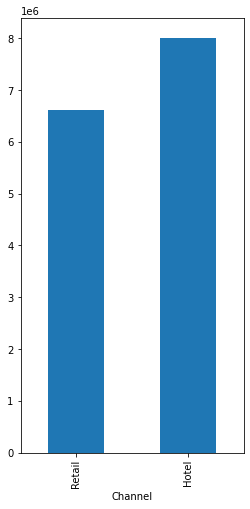

In [103]:
plt.figure(figsize=(4,8))
df.groupby('Channel').sum()['Total'].sort_values(ascending=True).plot(kind='bar')

<AxesSubplot:xlabel='Region'>

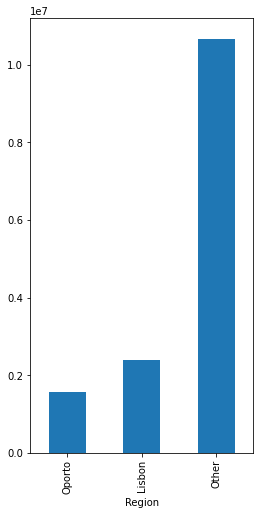

In [104]:
plt.figure(figsize=(4,8))
df.groupby('Region').sum()['Total'].sort_values(ascending=True).plot(kind='bar')

## 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [18]:
Retail=df[df['Channel']=='Retail']

In [19]:
Retail.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,183.000000,8904.323944,10716.500000,16322.852113,1652.612676,7269.507042,1753.436620,46619.232394
std,132.136132,8987.714750,9679.631351,12267.318094,1812.803662,6291.089697,1953.797047,29346.866491
min,1.000000,18.000000,928.000000,2743.000000,33.000000,332.000000,3.000000,14993.000000
25%,61.250000,2347.750000,5938.000000,9245.250000,534.250000,3683.500000,566.750000,30147.250000
50%,166.500000,5993.500000,7812.000000,12390.000000,1081.000000,5614.500000,1350.000000,37139.000000
75%,303.750000,12229.750000,12162.750000,20183.500000,2146.750000,8662.500000,2156.000000,51650.500000
max,438.000000,44466.000000,73498.000000,92780.000000,11559.000000,40827.000000,16523.000000,199891.000000


In [20]:
Hotel=df[df['Channel']=='Hotel']

In [21]:
Hotel.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,238.369128,13475.560403,3451.724832,3962.137584,3748.251678,790.560403,1415.956376,26844.191275
std,120.910343,13831.687502,4352.165571,3545.513391,5643.912500,1104.093673,3147.426922,22164.839073
min,4.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,137.250000,4070.250000,1164.500000,1703.750000,830.000000,183.250000,379.000000,13859.250000
50%,241.500000,9581.500000,2157.000000,2684.000000,2057.500000,385.500000,821.000000,21254.500000
75%,344.500000,18274.750000,4029.500000,5076.750000,4558.750000,899.500000,1548.000000,32113.750000
max,440.000000,112151.000000,43950.000000,21042.000000,60869.000000,6907.000000,47943.000000,190169.000000


In [22]:
Lisbon=df[df['Region']=='Lisbon']

In [23]:
Lisbon.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,235.000000,11101.727273,5486.415584,7403.077922,3000.337662,2651.116883,1354.896104,30997.571429
std,22.371857,11557.438575,5704.856079,8496.287728,3092.143894,4208.462708,1345.423340,20321.813773
min,197.000000,18.000000,258.000000,489.000000,61.000000,5.000000,7.000000,4925.000000
25%,216.000000,2806.000000,1372.000000,2046.000000,950.000000,284.000000,548.000000,17184.000000
50%,235.000000,7363.000000,3748.000000,3838.000000,1801.000000,737.000000,806.000000,25385.000000
75%,254.000000,15218.000000,7503.000000,9490.000000,4324.000000,3593.000000,1775.000000,38699.000000
max,273.000000,56083.000000,28326.000000,39694.000000,18711.000000,19410.000000,6854.000000,107155.000000


In [24]:
Oporto=df[df['Region']=='Oporto']

In [25]:
Oporto.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,317.000000,9887.680851,5088.170213,9218.595745,4045.361702,3687.468085,1159.702128,33086.978723
std,13.711309,8387.899211,5826.343145,10842.745314,9151.784954,6514.717668,1050.739841,24234.507325
min,294.000000,3.000000,333.000000,1330.000000,131.000000,15.000000,51.000000,4129.000000
25%,305.500000,2751.500000,1430.500000,2792.500000,811.500000,282.500000,540.500000,20611.500000
50%,317.000000,8090.000000,2374.000000,6114.000000,1455.000000,811.000000,898.000000,26953.000000
75%,328.500000,14925.500000,5772.500000,11758.500000,3272.000000,4324.500000,1538.500000,36158.500000
max,340.000000,32717.000000,25071.000000,67298.000000,60869.000000,38102.000000,5609.000000,130877.000000


In [26]:
Other=df[df['Region']=='Other']

In [27]:
Other.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,202.613924,12533.471519,5977.085443,7896.363924,2944.594937,2817.753165,1620.601266,33789.870253
std,143.615303,13389.213115,7935.463443,9537.287778,4260.126243,4593.051613,3232.581660,27949.337752
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,79.750000,3350.750000,1634.000000,2141.500000,664.750000,251.250000,402.000000,17209.250000
50%,158.500000,8752.500000,3684.500000,4732.000000,1498.000000,856.000000,994.000000,28029.000000
75%,361.250000,17406.500000,7198.750000,10559.750000,3354.750000,3875.750000,1832.750000,42492.250000
max,440.000000,112151.000000,73498.000000,92780.000000,36534.000000,40827.000000,47943.000000,199891.000000


## 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [28]:
df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

In [29]:
df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].std()

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
dtype: float64

In [30]:
df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].median()

Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64

In [31]:
df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].var()

Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64

In [32]:
df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].quantile(0.75)

Fresh               16933.75
Milk                 7190.25
Grocery             10655.75
Frozen               3554.25
Detergents_Paper     3922.00
Delicatessen         1820.25
Name: 0.75, dtype: float64

In [33]:
df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].quantile(0.25)

Fresh               3127.75
Milk                1533.00
Grocery             2153.00
Frozen               742.25
Detergents_Paper     256.75
Delicatessen         408.25
Name: 0.25, dtype: float64

In [34]:
df.corr()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
Buyer/Spender,1.000000,-0.061151,-0.162290,-0.140509,0.053802,-0.134365,-0.101845,-0.150745
Fresh,-0.061151,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,0.575178
Milk,-0.162290,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,0.776909
Grocery,-0.140509,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,0.740680
Frozen,0.053802,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,0.388436
Detergents_Paper,-0.134365,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,0.633882
Delicatessen,-0.101845,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,0.496849
Total,-0.150745,0.575178,0.776909,0.740680,0.388436,0.633882,0.496849,1.000000


we can say that, Fresh item show the least inconsistent behavior in the declared assets as the coefficient of variation is the lowest for it. On the other hand,Delicatessen item show the most inconsistent behavior in the declared assets as the CV is the highest.

## 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

C:\Users\l\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\l\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\l\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\l\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\l\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\l\anaconda3\lib\site-packages\seaborn\_core.py

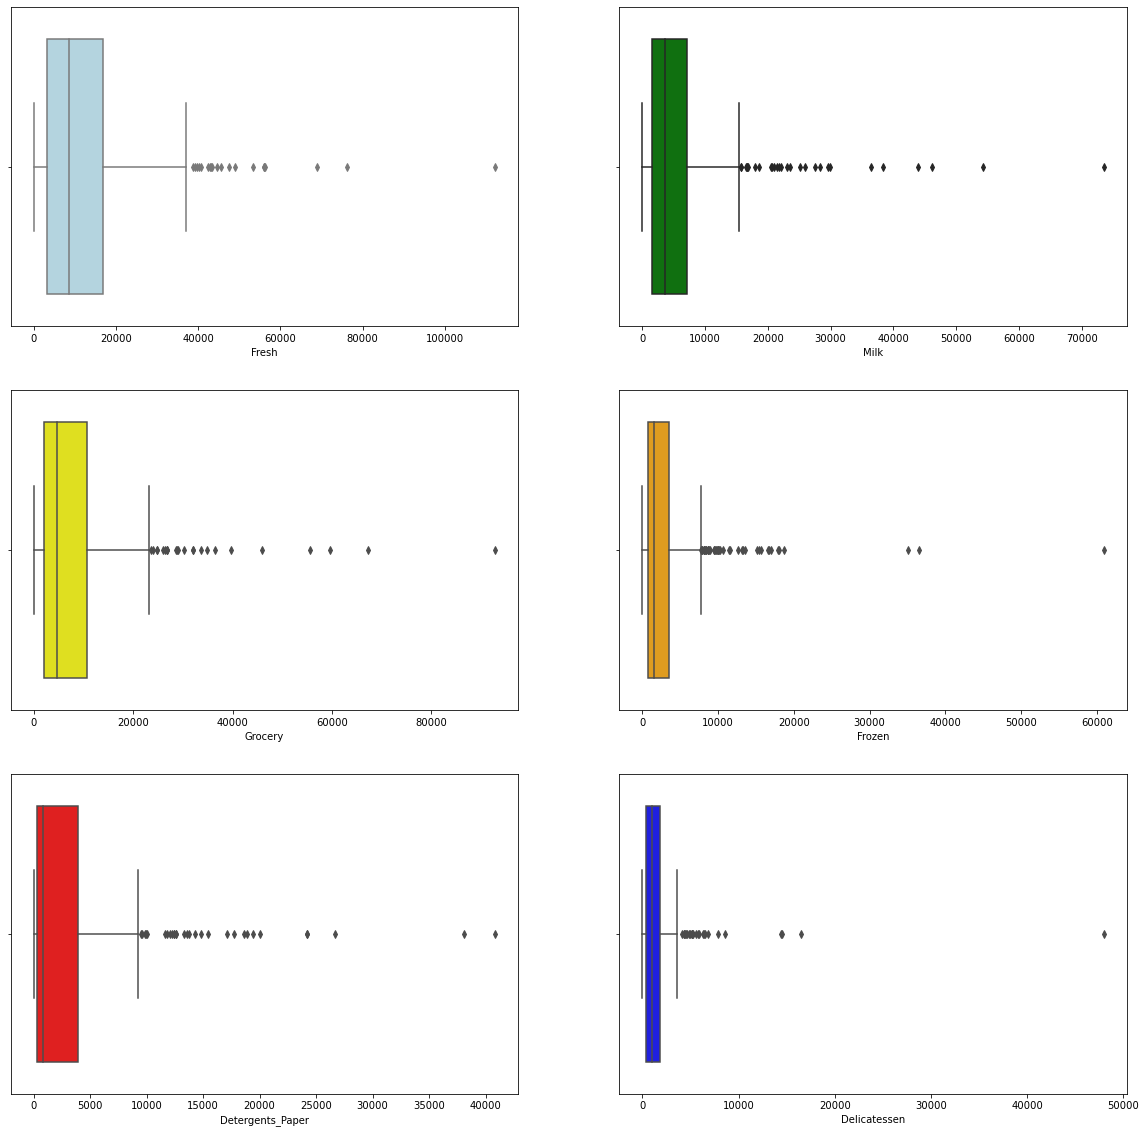

In [35]:
## Checking Outliers

plt.figure(figsize=(20,20))
plt.subplot(3,2,1)
sns.boxplot(x=df.Fresh,color='lightblue',orient='v')

plt.subplot(3,2,2)
sns.boxplot(x=df['Milk'],color='green',orient='v')

plt.subplot(3,2,3)
sns.boxplot(x='Grocery',color='yellow',data=df,orient='v')

plt.subplot(3,2,4)
sns.boxplot(x=df.Frozen,color='Orange',orient='v')

plt.subplot(3,2,5)
sns.boxplot(x=df['Detergents_Paper'],color='Red',orient='v')

plt.subplot(3,2,6)
sns.boxplot(x=df.Delicatessen,color='Blue',orient='v')

plt.show()


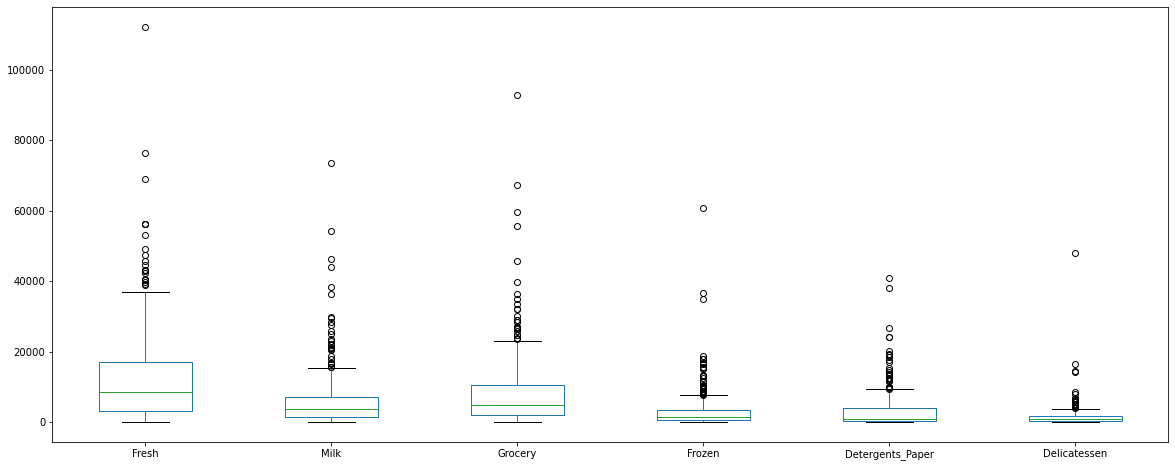

In [36]:
## Checking Outliers

df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']].plot(kind='box',figsize=[20,8])
plt.show()

Box plot is the best pictorial presentation to show the outliers. Clearly, both Region and Channel have outliers across all the items.

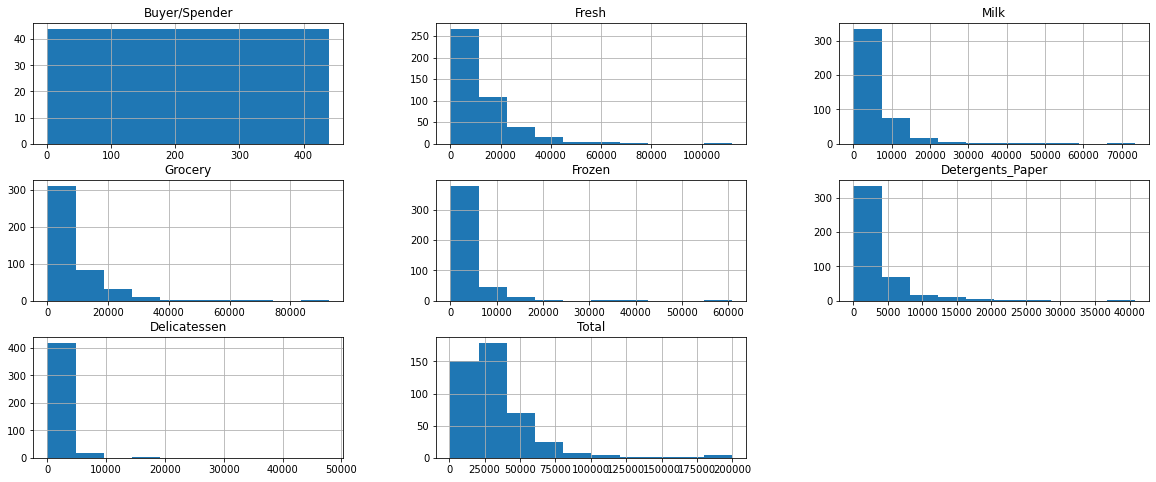

In [37]:
df.hist(figsize=(20,8))
plt.show()

## 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective


As per the analysis, I find out that there are inconsistencies in spending of different items (by calculating Coefficient of Variation), which should be minimized. The spending of Hotel and Retail channel are different which should be more or less equal. And also spent should equal for different regions. Need to focus on other items also than “Fresh” and “Grocery”.we can say that, Fresh item show the least inconsistent behavior in the declared assets as the coefficient of variation is the lowest for it. On the other hand,Delicatessen item show the most inconsistent behavior in the declared assets as the CV is the highest.Box plot is the best pictorial presentation to show the outliers. Clearly, both Region and Channel have outliers across all the items.


## Problem 2

In [38]:
import numpy as np
import pandas as pd
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
import scipy.stats as stats
import matplotlib.pyplot as plt

In [39]:
## Checking the current working directory
os.getcwd()

'C:\\Users\\l\\Downloads'

In [40]:
## Changing the working directory
os.chdir('C:\\Users\\l\\Downloads')

In [41]:
df1 = pd.read_csv('Survey-1.csv')

In [42]:
## Checking for missing value in any column
df1.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

In [43]:
df1.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)
2.1.1. Gender and Major

2.1.2. Gender and Grad Intention

2.1.3. Gender and Employment

2.1.4. Gender and Computer

In [44]:
pd.crosstab(df1['Gender'],df1['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [45]:
pd.crosstab(df1['Gender'],df1['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [46]:
pd.crosstab(df1['Gender'],df1['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [47]:
pd.crosstab(df1['Gender'],df1['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [48]:
df1['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [105]:
print('Probability that a randomly selected CMSU student will be male:',29/len(df1['Gender']))

Probability that a randomly selected CMSU student will be male: 0.46774193548387094


In [106]:
print('Probability that a randomly selected CMSU student will be female:',33/len(df1['Gender']))

Probability that a randomly selected CMSU student will be female: 0.532258064516129


## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [51]:
pd.crosstab(df1['Gender'],df1['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


P (education | male) = P (education ∩ male)/ P(male)

P (education | female) = P (education ∩ female)/ P(female)

In [52]:
print('Among MALE candidates:')
print('Probability of having a Major Accounting:',4/29)
print('Probability of being a CIS:',1/29)
print('Probability of being Economics/Finance:',4/29)
print('Probability of being a International Business:',2/29)
print('Probability of being a Management:',6/29)
print('Probability of being a Other:',4/29)
print('Probability of being a Retailing/Marketing:',5/29)
print('Probability of being a Undecided:',3/29)
print()
print('Among FEMALE candidates:')
print('Probability of having a Major Accounting:',3/33)
print('Probability of being a CIS:',3/33)
print('Probability of being Economics/Finance:',7/33)
print('Probability of being a International Business:',4/33)
print('Probability of being a Management:',4/33)
print('Probability of being a Other:',3/33)
print('Probability of being a Retailing/Marketing:',9/33)
print('Probability of being a Undecided:',0/33)
print()

Among MALE candidates:
Probability of having a Major Accounting: 0.13793103448275862
Probability of being a CIS: 0.034482758620689655
Probability of being Economics/Finance: 0.13793103448275862
Probability of being a International Business: 0.06896551724137931
Probability of being a Management: 0.20689655172413793
Probability of being a Other: 0.13793103448275862
Probability of being a Retailing/Marketing: 0.1724137931034483
Probability of being a Undecided: 0.10344827586206896

Among FEMALE candidates:
Probability of having a Major Accounting: 0.09090909090909091
Probability of being a CIS: 0.09090909090909091
Probability of being Economics/Finance: 0.21212121212121213
Probability of being a International Business: 0.12121212121212122
Probability of being a Management: 0.12121212121212122
Probability of being a Other: 0.09090909090909091
Probability of being a Retailing/Marketing: 0.2727272727272727
Probability of being a Undecided: 0.0



## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:
2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [53]:
print("P(Grad Intends and Male) = P (Grad Intends| Male) x P (male) = ",(17/29) * (29/62))

P(Grad Intends and Male) = P (Grad Intends| Male) x P (male) =  0.27419354838709675


In [54]:
print("P(NOT have a laptop and Female) = P (NOT have a laptop | Female) x P (Female) = ",(29/33) * (33/62))

P(NOT have a laptop and Female) = P (NOT have a laptop | Female) x P (Female) =  0.46774193548387094


## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [55]:
Male_Students=29
Students_with_full_time_employment=10
Male_Students_with_full_time_employment=7
Total_no_of_Students=62
Prob_male_or_has_full_time_employment=round((Male_Students+Students_with_full_time_employment-Male_Students_with_full_time_employment)/(Total_no_of_Students),3)*100
print('probability that a randomly chosen student is a male or has full time employment is %1.1f' %Prob_male_or_has_full_time_employment +'%')

probability that a randomly chosen student is a male or has full time employment is 51.6%


In [56]:
print("P(international business or management | Female) = P(Female|Internation Business) + P(Female|Management)= ",(4/33)+(4/33))

P(international business or management | Female) = P(Female|Internation Business) + P(Female|Management)=  0.24242424242424243


## 2.6. Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [57]:
d=pd.crosstab(df1['Gender'],df1['Grad Intention'])
d.drop('Undecided', axis=1, inplace=True) ## Dropping the undecided column so that we have Intent to graduate as Yes and No 
d['Total']=d.sum(axis=1)   ## Adding columns totals
d

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20


## P(F ∩ Yes)

In [58]:
d.loc['Female']['Yes']/d['Total'].sum()

0.275

## P(F)P(Yes)

In [59]:
(d.loc['Female']['Total']/d['Total'].sum())*(d['Yes'].sum()/d['Total'].sum())

0.35

In [60]:
## The two events are not independent since P(F ∩ yes) != P(F)P(Yes)

## 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.
Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [61]:
df1[df1['GPA']<3].groupby(['Gender']).count()['GPA'].sum()

17

In [62]:
Total_Student = 62
Total_Student_GPA_less_than_3 = 17
prob_less_than_3 = round(Total_Student_GPA_less_than_3/Total_Student,4)*100
print('probability that his/her GPA is less than_3 is %1.1f',prob_less_than_3)

probability that his/her GPA is less than_3 is %1.1f 27.42


In [63]:
df1[df1['Salary']>=50].groupby(['Gender']).count()['Salary']

Gender
Female    18
Male      14
Name: Salary, dtype: int64

In [64]:
Number_of_Male_having_salary_more_than_equal_to_50 = 14
Total_number_of_Male_Students = 29
prob_Male_earns_50_or_more = round(Number_of_Male_having_salary_more_than_equal_to_50/Total_number_of_Male_Students,4)*100
print('probability that a randomly selected male earns 50 or more is %1.1f',prob_Male_earns_50_or_more)

probability that a randomly selected male earns 50 or more is %1.1f 48.28


In [65]:
Number_of_Female_having_salary_more_than_equal_to_50 = 18
Total_number_of_Female_Students = 33
prob_Female_earns_50_or_more = round(Number_of_Female_having_salary_more_than_equal_to_50/Total_number_of_Female_Students,4)*100
print('probability that a randomly selected female earns 50 or more is %1.1f',prob_Female_earns_50_or_more)

probability that a randomly selected female earns 50 or more is %1.1f 54.55


## 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


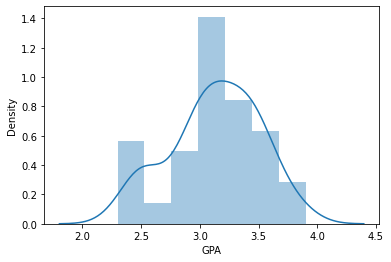

In [66]:
## Distribution of GPA
sns.distplot(df1['GPA'])
plt.show()

C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


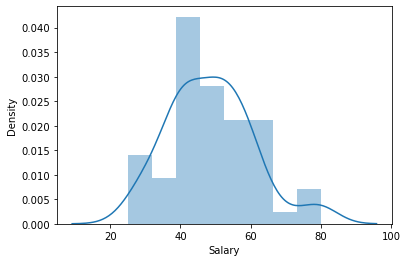

In [67]:
## ## Distribution of Salary
sns.distplot(df1['Salary'])
plt.show()

C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


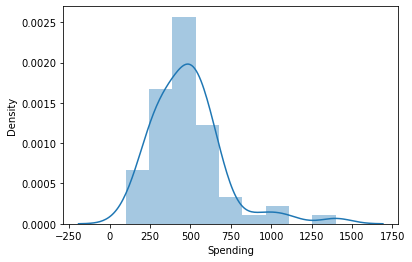

In [68]:
## Distribution of Spending
sns.distplot(df1['Spending'])
plt.show()

C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


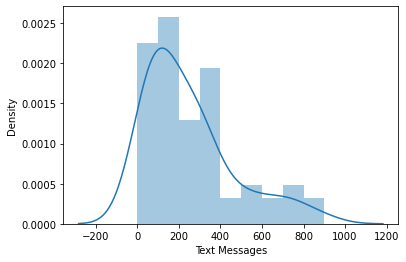

In [69]:
## Distribution of Text Messages
sns.distplot(df1['Text Messages'])
plt.show()

In [70]:
## Calculate the mean of GPA, Salary ,Spending and Text Messages

n1 = round(np.mean(df1['GPA']))
print("The mean of GPA is {}" .format(n1))

n2 = round(np.mean(df1['Salary']))
print("The mean of Salary is {}". format(n2))

n3 = round(np.mean(df1['Spending']),2)
print("The mean of Spending is {}". format(n3))

n4 = round(np.mean(df1['Text Messages']),2)
print("The mean of Text Messages is {}". format(n4))

The mean of GPA is 3
The mean of Salary is 49
The mean of Spending is 482.02
The mean of Text Messages is 246.21


In [71]:
## Calculate the median of GPA, Salary ,Spending and Text Messages

m1 = np.median(df1['GPA'])
print("The median of GPA is {}" .format(m1))

m2 = np.median(df1['Salary'])
print("The median of Salary is {}". format(m2))

m3 = np.median(df1['Spending'])
print("The median of Spending is {}". format(m3))

m4 = np.median(df1['Text Messages'])
print("The median of Text Messages is {}". format(m4))


The median of GPA is 3.1500000000000004
The median of Salary is 50.0
The median of Spending is 500.0
The median of Text Messages is 200.0


In [72]:
## Calculate the mode of GPA, Salary ,Spending and Text Messages
from statistics import mode
mod1 = mode(df1['GPA'])
print("The mode of GPA is {}". format(mod1))

mod2 = mode(df1['Salary'])
print("The mode of Salary in the dataset is {}". format(mod2))

mod3 = mode(df1['Spending'])
print("The mode of Spending in the dataset is {}". format(mod3))

mod4 = mode(df1['Text Messages'])
print("The mode of Text Messages in the dataset is {}". format(mod4))

The mode of GPA is 3.0
The mode of Salary in the dataset is 40.0
The mode of Spending in the dataset is 500
The mode of Text Messages in the dataset is 300


In [73]:
def empirical(x):
    sd = x.std()
    mean = x.mean()
    
    print ("68% of the data should lie between {} and {}".format(mean-sd, mean+sd))
    print("{}% data lies LL and UL for 68%". format(pd.Series((x >mean-sd) & (x<mean+sd)).value_counts(normalize=True).values[0]*100),'\n')
    
    print ("95% of the data should lie between {} and {}".format(mean-(2*sd), mean+(2*sd)))
    print("{}% data lies LL and UL for 95%". format(pd.Series((x >mean-(2*sd)) & (x<mean+(2*sd))).value_counts(normalize=True).values[0]*100),'\n')
    
    print ("99% of the data should lie between {} and {}".format(mean-(3*sd), mean+(3*sd)))
    print("{}% data lies LL and UL for 99%". format(pd.Series((x >mean-(3*sd)) & (x<mean+(3*sd))).value_counts(normalize=True).values[0]*100),'\n')
    

In [74]:
empirical(df1['GPA'])

68% of the data should lie between 2.7516438653676043 and 3.5064206507614277
72.58064516129032% data lies LL and UL for 68% 

95% of the data should lie between 2.3742554726706926 and 3.8838090434583394
96.7741935483871% data lies LL and UL for 95% 

99% of the data should lie between 1.9968670799737804 and 4.261197436155252
100.0% data lies LL and UL for 99% 



In [75]:
empirical(df1['Salary'])

68% of the data should lie between 36.46747488043692 and 60.62929931311147
79.03225806451613% data lies LL and UL for 68% 

95% of the data should lie between 24.38656266409964 and 72.71021152944874
95.16129032258065% data lies LL and UL for 95% 

99% of the data should lie between 12.30565044776236 and 84.79112374578602
100.0% data lies LL and UL for 99% 



In [76]:
empirical(df1['Spending'])

68% of the data should lie between 260.062324066296 and 703.9699339982201
80.64516129032258% data lies LL and UL for 68% 

95% of the data should lie between 38.10851910033398 and 925.9237389641821
95.16129032258065% data lies LL and UL for 95% 

99% of the data should lie between -183.84528586562806 and 1147.8775439301442
98.38709677419355% data lies LL and UL for 99% 



In [77]:
empirical(df1['Text Messages'])

68% of the data should lie between 31.74372711665876 and 460.67562772205093
79.03225806451613% data lies LL and UL for 68% 

95% of the data should lie between -182.72222318603733 and 675.141578024747
91.93548387096774% data lies LL and UL for 95% 

99% of the data should lie between -397.18817348873336 and 889.6075283274431
98.38709677419355% data lies LL and UL for 99% 



array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

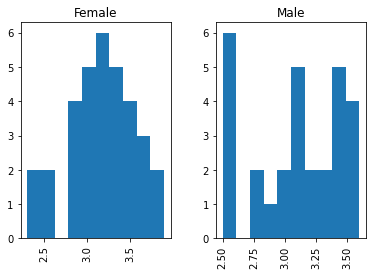

In [78]:
df1.hist(by='Gender',column = 'GPA')

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

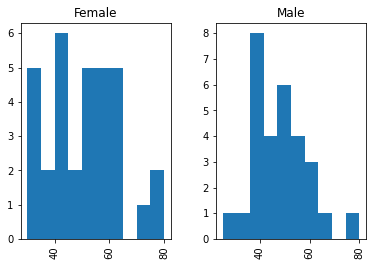

In [79]:
df1.hist(by='Gender',column = 'Salary')

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

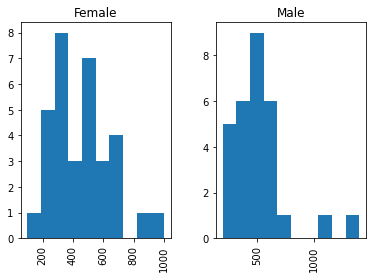

In [80]:
df1.hist(by='Gender',column = 'Spending')

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

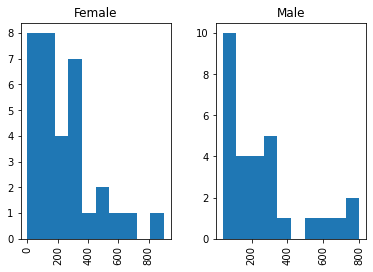

In [81]:
df1.hist(by='Gender',column = 'Text Messages')

## Problem 3 

In [82]:
import numpy                     as     np
import pandas as     pd
from   scipy.stats               import ttest_1samp, ttest_ind
import matplotlib.pyplot         as     plt
import matplotlib
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sm

In [83]:
## Checking the current working directory
os.getcwd()

'C:\\Users\\l\\Downloads'

In [84]:
## Changing the working directory
os.chdir('C:\\Users\\l\\Downloads')

In [85]:
mydata = pd.read_csv('A+&+B+shingles.csv')

In [86]:
mydata.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [87]:
mydata.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


## 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='A', ylabel='Density'>

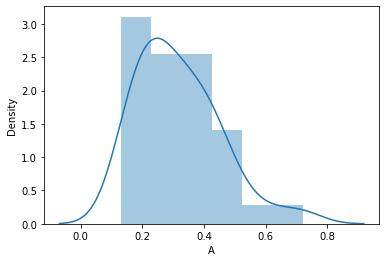

In [88]:
sns.distplot(mydata['A'])

C:\Users\l\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B', ylabel='Density'>

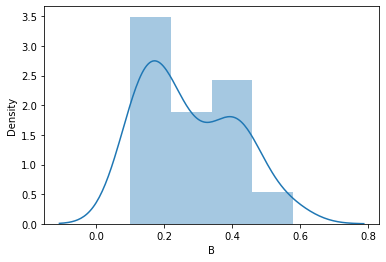

In [89]:
sns.distplot(mydata['B'])

In [90]:
mydata.skew()

A    0.950619
B    0.513424
dtype: float64

## Step 1: Define null and alternative hypotheses

H0 : mean moisture content <=0.35

HA : mean moisture content > 0.35

## Step 2: Decide the significance level

In [91]:
print("The sample size for this problem is",len(mydata))

The sample size for this problem is 36


Here we select  𝛼  = 0.05.

## Step 3: Calculate the p - value and test statistic

## For the A shingles,the null and alternative hypothesis to test whether the population mean moisture content is lessthan 0.35 pound per 100 square feet is given:

H0 : mean moisture content <=0.35

HA : mean moisture content > 0.35

In [92]:
tstat,pvalue = stats.ttest_1samp(np.array(mydata['A'].dropna()),0.35)

In [93]:
tstat,pvalue

(-1.4735046253382782, 0.14955266289815025)

In [94]:
print('So, the p-value will be:',1-(pvalue/2))

So, the p-value will be: 0.9252236685509249


In [95]:
# p_value < 0.05 => alternative hypothesis:

p_value_greater=1-(pvalue/2)

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)

if p_value_greater > 0.05: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", 1-(pvalue/2))

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.9252236685509249


## For the B shingles,the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet is
given:

H0 : mean moisture content <=0.35
        
HA : mean moisture content > 0.35

In [96]:
tstat,p_value = stats.ttest_1samp(np.array(mydata['B'].dropna()),0.35)

In [97]:
tstat,p_value

(-3.1003313069986995, 0.004180954800638363)

In [98]:
print('So, the p-value will be:',1-(p_value/2))

So, the p-value will be: 0.9979095225996808


In [99]:
# p_value < 0.05 => alternative hypothesis:
p_value_greater=1-(p_value/2)

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)

if p_value_greater > 0.05: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", 1-(p_value/2))

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= 0.9979095225996808


## 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

H0 : mean for shingles A

HA : mean for shingles B
    
    H0 = HA

In [100]:
SA_data = np.array(mydata['A'].dropna())
SB_data = np.array(mydata['B'].dropna())
tstat,pvalue = stats.ttest_ind(SA_data,SB_data,equal_var=True,nan_policy='omit')

In [101]:
tstat,pvalue

(1.289628271966112, 0.2017496571835328)

In [102]:
# p_value < 0.05 => alternative hypothesis:
# the population means for shingles A and B are equal


alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
print ("Our t-test p-value=", pvalue)


if pvalue < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 


Level of significance: 0.05
Our t-test p-value= 0.2017496571835328
We have no evidence to reject the null hypothesis since p value > Level of significance








## END
